In [16]:
import torch as t
import torch_geometric as pyg
import dgl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import numpy as np
from torch_geometric.data import Data
from gnns import GAE
from training import train_edge_predictor
from graph_utils import adj_to_edge_index, edge_index_to_adj

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
dataset = dgl.data.BAShapeDataset()
src, dst = dataset[0].edges()
edge_index = t.stack([src, dst], dim=0)
x = dataset[0].ndata["feat"]
labels = dataset[0].ndata["label"]

Done loading data from cached files.


In [35]:
train_graphs = [
    Data(x=x, edge_index=edge_index)
]

In [36]:
gae = GAE(1, 64, gcn_layers = 4)

100%|██████████| 1000/1000 [00:07<00:00, 128.69it/s]


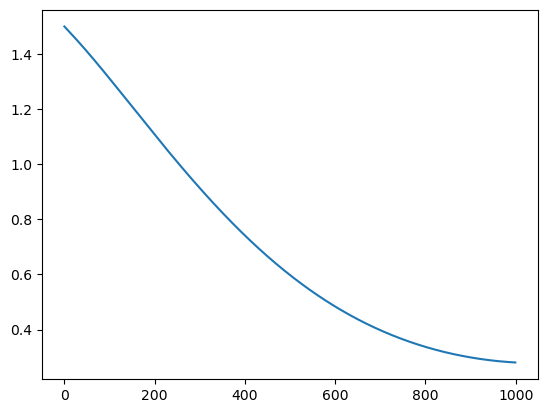

In [44]:
losses = train_edge_predictor(gae, train_graphs, 1000, lr=1e-5)
plt.plot(losses)

In [40]:
adj_pred = gae(train_graphs[0].x, train_graphs[0].edge_index).detach()
adj_pred

tensor([[0.4581, 0.4581, 0.4581,  ..., 0.5668, 0.6176, 0.3892],
        [0.4581, 0.4581, 0.4581,  ..., 0.5668, 0.6176, 0.3892],
        [0.4581, 0.4581, 0.4581,  ..., 0.5668, 0.6176, 0.3892],
        ...,
        [0.5668, 0.5668, 0.5668,  ..., 0.7014, 0.7642, 0.4816],
        [0.6176, 0.6176, 0.6176,  ..., 0.7642, 0.8327, 0.5246],
        [0.3892, 0.3892, 0.3892,  ..., 0.4816, 0.5246, 0.3308]])

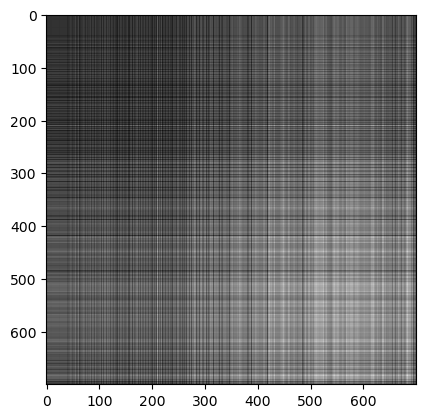

In [45]:
plt.imshow(adj_pred.numpy(), cmap="gray")

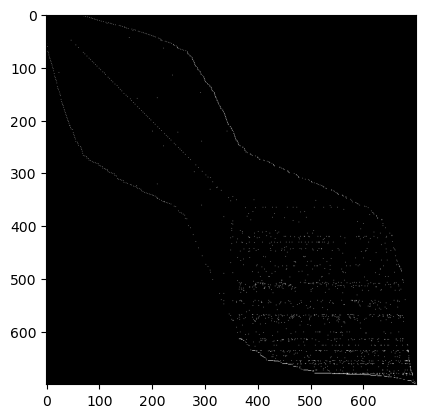

In [46]:
plt.imshow(edge_index_to_adj(train_graphs[0].edge_index).numpy(), cmap="gray")